## Exercise 0 Task 0:  Car sales in Norway - emissions and trends

### In this exercise, I work with dataset norway_new_car_sales_by_month.csv

### Column explanations

**Basic Info About Sales**
- Year: The year when the car sales happened (e.g., 2020).
- Month: The month of the sales (e.g., January).

**Total Car Sales (New + Used Imports)**
- Quantity: How many new cars were sold in Norway that month.
- Quantity_YoY: How this number changed compared to the same month last year. (YoY = Year-over-Year)

**Used Cars Imported to Norway**
- Import: How many used cars were imported from other countries into Norway that month.
- Import_YoY: Change in imported used cars compared to the same month last year.

**Used Cars Sold Inside Norway**
- Used: Number of used cars sold within Norway (ownership change inside the country). Available from 2012 onwards.
- Used_YoY: Change in domestic used car sales compared to the same month last year.

**CO2 Emissions (grams per km)**
- Avg_CO2: Average CO2 emissions from all cars sold in that month.
- Bensin_CO2: Average CO2 emissions from gasoline (bensin) cars sold.
- Diesel_CO2: Average CO2 emissions from diesel cars sold.

**Diesel Car Data**
- Quantity_Diesel: How many diesel cars were sold.
- Diesel_Share: What percentage of all car sales were diesel that month.
- Diesel_Share_LY: Diesel share of total sales in the same month last year (for comparison).

**Electric & Hybrid Vehicles**
- Quantity_Hybrid: Number of new hybrid cars sold (includes both plug-in hybrids and regular hybrids).
- Quantity_Electric: Number of new fully electric cars sold.
- Import_Electric: Number of used electric cars imported into Norway.

## a) Basic EDA:
- find out column names
- shape of dataset
- summary descriptive statistics.

In [12]:
import pandas as pd

df_sales_monthly = pd.read_csv("data/norway_new_car_sales_by_month.csv")
df_sales_monthly.head()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN


In [13]:
df_sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               121 non-null    int64  
 1   Month              121 non-null    int64  
 2   Quantity           121 non-null    int64  
 3   Quantity_YoY       121 non-null    int64  
 4   Import             121 non-null    int64  
 5   Import_YoY         121 non-null    int64  
 6   Used               61 non-null     float64
 7   Used_YoY           49 non-null     float64
 8   Avg_CO2            121 non-null    int64  
 9   Bensin_Co2         121 non-null    int64  
 10  Diesel_Co2         121 non-null    int64  
 11  Quantity_Diesel    121 non-null    int64  
 12  Diesel_Share       121 non-null    float64
 13  Diesel_Share_LY    121 non-null    float64
 14  Quantity_Hybrid    73 non-null     float64
 15  Quantity_Electric  73 non-null     float64
 16  Import_Electric    53 non-

In [14]:
# instead of 
# df_sales_monthly.shape 

print("Rows: {} and Columns: {}".format(*df_sales_monthly.shape))
print("Number of Nan {}".format(df_sales_monthly.isna().sum().sum()))
df_sales_monthly.fillna(0, inplace=True)

Rows: 121 and Columns: 17
Number of Nan 296


In [18]:
df_sales_monthly.describe().T

,count,mean,min,25%,50%,75%,max,std
Year,121.0,2011.545455,2007.0,2009.0,2012.0,2014.0,2017.0,2.915476
Month,121.0,6.454545,1.0,3.0,6.0,9.0,12.0,3.488075
Quantity,121.0,11134.297521,5353.0,10250.0,11385.0,12337.0,14207.0,1752.046397
Quantity_YoY,121.0,392.586777,-4548.0,-526.0,493.0,1445.0,5227.0,1789.539953
Import,121.0,2204.371901,1048.0,1812.0,2263.0,2625.0,3768.0,573.127896
Import_YoY,121.0,-135.049587,-1810.0,-495.0,-114.0,162.0,1334.0,545.395787
Used,121.0,18584.702479,0.0,0.0,24106.0,37079.0,44106.0,18748.569602
Used_YoY,121.0,394.07438,-6261.0,0.0,0.0,327.0,5896.0,1791.335215
Avg_CO2,121.0,129.520661,84.0,110.0,132.0,151.0,162.0,22.719338
Bensin_Co2,121.0,133.735537,94.0,120.0,131.0,150.0,165.0,17.094233


## b) Draw a line chart of quantity for each year.
### Note: We skip year 2017, data is incomplete for this year

In [22]:
import duckdb

df_quantity_per_year = duckdb.query("""
            SELECT 
                Year,
                SUM(Quantity) AS Quantity
             FROM df_sales_monthly
             GROUP BY 
                Year 
             ORDER BY Year ASC         
             """).df().set_index("Year")

df_quantity_per_year

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


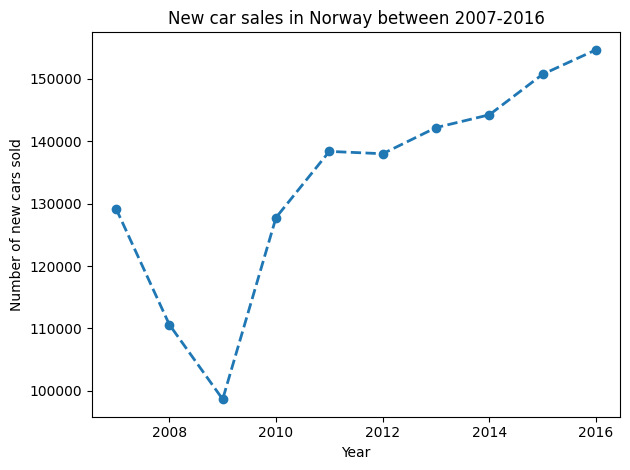

In [24]:
ax = df_quantity_per_year.iloc[:-1].plot(
    title="New car sales in Norway between 2007-2016", 
    xlabel="Year", 
    ylabel="Number of new cars sold",
    style="--o",
    linewidth=2
    )

ax.legend().remove()
fig = ax.get_figure()

fig.tight_layout()
fig.savefig("figures/new_car_sales_yearly_line.png")

## c) Draw a line chart of average CO2 emissions for same years that as in b)

In [17]:
# Add datetime but in pandas
df_sales_monthly['date'] = pd.to_datetime(df_sales_monthly[['Year', 'Month']].assign(day=1))
df_sales_monthly.head()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric,date
0,2007,1,12685,5227,2276,257,0.0,0.0,152,155,152,10072,79.4,52.5,0.0,0.0,0.0,2007-01-01
1,2007,2,9793,2448,1992,-89,0.0,0.0,156,159,155,7222,73.7,47.4,0.0,0.0,0.0,2007-02-01
2,2007,3,11264,1445,2626,45,0.0,0.0,159,161,158,7965,70.7,48.1,0.0,0.0,0.0,2007-03-01
3,2007,4,8854,504,2220,-130,0.0,0.0,160,165,158,6116,69.1,48.4,0.0,0.0,0.0,2007-04-01
4,2007,5,12007,1592,2881,7,0.0,0.0,160,163,159,8519,71.0,49.1,0.0,0.0,0.0,2007-05-01


In [25]:
import duckdb

df_CO2_per_year = duckdb.query("""--sql
            SELECT 
                Year,
                SUM(Avg_CO2) AS Yearly_CO2
             FROM df_sales_monthly
             GROUP BY 
                Year 
             ORDER BY Year ASC         
             """).df().set_index("Year")

df_CO2_per_year

,Yearly_CO2
Year,
2007,1908.0
2008,1896.0
2009,1811.0
2010,1688.0
2011,1608.0
2012,1559.0
2013,1476.0
2014,1325.0
2015,1197.0


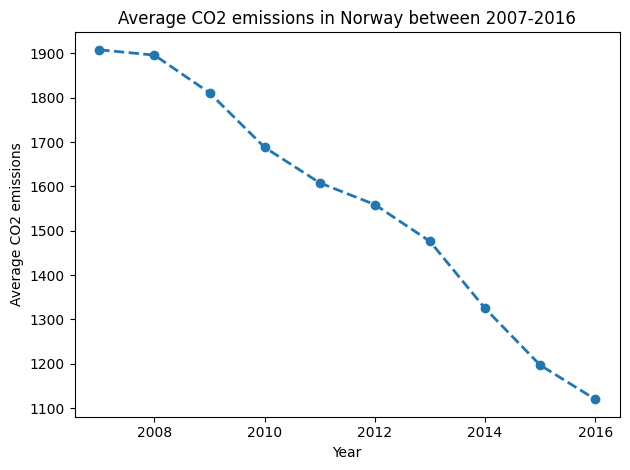

In [26]:
ax = df_CO2_per_year.iloc[:-1].plot(
    title="Average CO2 emissions in Norway between 2007-2016", 
    xlabel="Year", 
    ylabel="Average CO2 emissions",
    style="--o",
    linewidth=2
    )

ax.legend().remove()
fig = ax.get_figure()

fig.tight_layout()
fig.savefig("figures/CO2_emissions_yearly_line.png")

# d) Draw a line chart of all years and months for import

In [27]:
import duckdb

df_import_per_year = duckdb.query("""--sql
            SELECT 
                Year,
                SUM(Import) AS Yearly_CO2
             FROM df_sales_monthly
             GROUP BY 
                Year 
             ORDER BY Year ASC         
             """).df().set_index("Year")

df_import_per_year

,Yearly_CO2
Year,
2007,33356.0
2008,27218.0
2009,24823.0
2010,29014.0
2011,27069.0
2012,30556.0
2013,30312.0
2014,24757.0
2015,21756.0


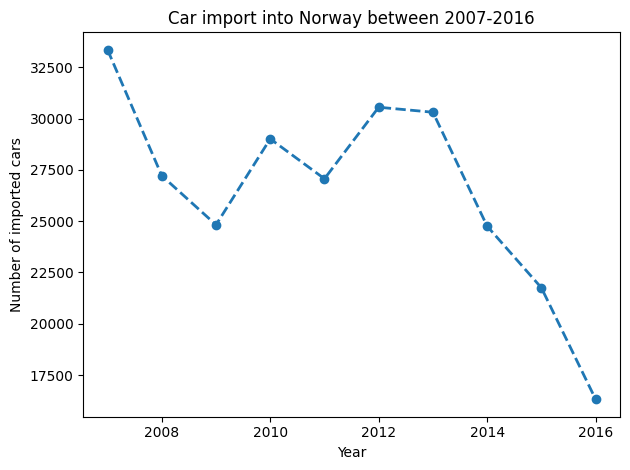

In [28]:
ax = df_import_per_year.iloc[:-1].plot(
    title="Car import into Norway between 2007-2016", 
    xlabel="Year", 
    ylabel="Number of imported cars",
    style="--o",
    linewidth=2
    )

ax.legend().remove()
fig = ax.get_figure()

fig.tight_layout()
fig.savefig("figures/No_imported_cars_yearly_line.png")

# e) Draw a line chart of all years and months for average CO2 emissions

In [29]:
df_CO2_per_month = duckdb.query("""--sql
            SELECT 
               date,
               Avg_CO2 Monthlu_CO2
             FROM df_sales_monthly
             ORDER BY date ASC        
             """).df().set_index("date")

df_CO2_per_month

,Monthlu_CO2
date,
2007-01-01,152
2007-02-01,156
2007-03-01,159
2007-04-01,160
2007-05-01,160
...,...
2016-09-01,88
2016-10-01,91
2016-11-01,88


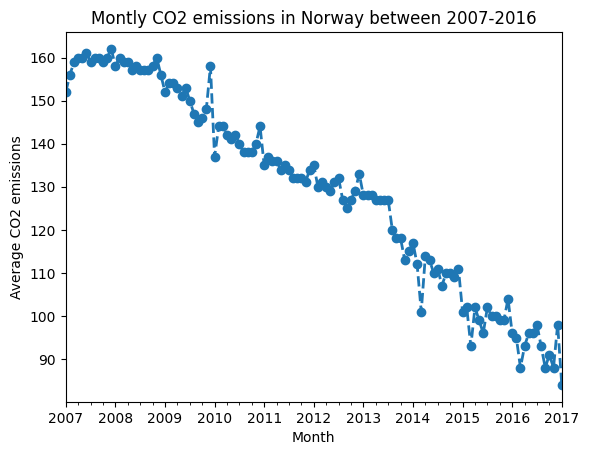

In [30]:
ax = df_CO2_per_month.plot(
    title="Montly CO2 emissions in Norway between 2007-2016", 
    xlabel="Month", 
    ylabel="Average CO2 emissions",
    style="--o",
    linewidth=2
    )

ax.legend().remove()
fig = ax.get_figure()

#fig.tight_layout()
#fig.savefig("figures/No_imported_cars_yearly_line.png")

# f) Draw a line chart of all years and months for electric cars import

#  g) Draw a line chart of average diesel share per year

# h) Discuss some findings with a friend based on this dataset, and do plot more graphs